In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
cur_dir = os.getcwd()
print("cur_dir : ", cur_dir, "\n")

cur_dir :  C:\Users\leah5\Documents\study 



In [3]:
# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()
print("cur_dir : ", cur_dir, "\n")

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list = os.listdir(cur_dir)
print("dir_list : ", dir_list, "\n")

# 특정 경로의 폴더(디렉토리) 생성
# os.mkdir(cur_dir + "/dataset")

# 지정한 파일의 이름을 변경
# os.rename('경로/파일명1', '경로/파일명2')
# print(os.path.exists('경로/파일명2'))

# 지정된 경로의 디렉토리를 순차적으로 탐색 -> 주로 for문과 활용
for curDir, dirs, files in os.walk(cur_dir): 
    print(curDir, dirs, files)
    for f in files:
        print(os.path.join(curDir, f))

cur_dir :  C:\Users\leah5\Documents\study 

dir_list :  ['(08.02)chapter 1. 데이터 전처리-샘플 데이터.ipynb', '(08.03) BankChurners 데이터 실습.ipynb', '(08.03)강사님_코드.ipynb', '(08.03)데이터전처리_모델학습.ipynb', '.ipynb_checkpoints', '0804 천재데이터 실습.ipynb', 'BankChurners.csv', 'churn_final', 'Dropout', 'KDT 3일차 실습용 코드.ipynb', '테이블명세서_cards.csv'] 

C:\Users\leah5\Documents\study ['.ipynb_checkpoints', 'churn_final', 'Dropout'] ['(08.02)chapter 1. 데이터 전처리-샘플 데이터.ipynb', '(08.03) BankChurners 데이터 실습.ipynb', '(08.03)강사님_코드.ipynb', '(08.03)데이터전처리_모델학습.ipynb', '0804 천재데이터 실습.ipynb', 'BankChurners.csv', 'KDT 3일차 실습용 코드.ipynb', '테이블명세서_cards.csv']
C:\Users\leah5\Documents\study\(08.02)chapter 1. 데이터 전처리-샘플 데이터.ipynb
C:\Users\leah5\Documents\study\(08.03) BankChurners 데이터 실습.ipynb
C:\Users\leah5\Documents\study\(08.03)강사님_코드.ipynb
C:\Users\leah5\Documents\study\(08.03)데이터전처리_모델학습.ipynb
C:\Users\leah5\Documents\study\0804 천재데이터 실습.ipynb
C:\Users\leah5\Documents\study\BankChurners.csv
C:\Users\leah5\Documents\study\KDT 3일

In [4]:
data_list = os.listdir('C:\\Users\\leah5\\Documents\\study\\churn_final\\')
print("데이터셋 목록(data_list) : ", data_list)

데이터셋 목록(data_list) :  ['.~lock.테이블명세서_초등이탈.xlsx#', 'learning_action_re.csv', 'learning_time_re.csv', 'sample_member_re.csv', '테이블명세서_초등이탈.xlsx']


### 데이터 불러오기

In [5]:
df1 = pd.read_csv('C:\\Users\\leah5\\Documents\\study\\churn_final\\learning_action_re.csv', index_col = 0).reset_index()
df2 = pd.read_csv('C:\\Users\\leah5\\Documents\\study\\churn_final\\learning_time_re.csv', index_col = 0).reset_index()
df3 = pd.read_csv('C:\\Users\\leah5\\Documents\\study\\churn_final\\sample_member_re.csv', index_col = 0, encoding='cp949').reset_index()

### 데이터 합치기

In [6]:
df = pd.merge(df3, df1, on = ['userid'], how = 'left')
df = pd.merge(df, df2 , on = ['userid','proc_ymd','mcode'], how = 'left')

In [7]:
df.head()

,index_x,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,re_purch,...,media_completed_yn,system_learning_time,restart_cnt,playtime_sum,score,item_cnt,quizcode_cnt,correct_cnt,solved_time_sum,solved_time_avg
0,0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False,...,N,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN
1,0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False,...,Y,20.0,3.0,NaN,80.0,5.0,5.0,4.0,105.0,21.000
2,0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False,...,Y,44.0,3.0,NaN,67.0,3.0,3.0,2.0,17.0,5.667
3,0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False,...,N,172.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False,...,N,NaN,NaN,NaN,100.0,1.0,1.0,1.0,NaN,NaN


## 컬럼별 결측치 확인

In [8]:
null_cnt_df = pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(df) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,index_x,0,0.00
1,userid,0,0.00
2,biz_sect_cd_nm,0,0.00
3,mbr_sex_cd_nm,0,0.00
4,mbr_step_cd_nm,0,0.00
5,user_grade_nm,0,0.00
6,mbr_status_cd_nm,0,0.00
7,grade_sect_cd,0,0.00
8,status,0,0.00
9,re_purch,0,0.00


## 결측치 대치

- 선택 : 제거 or 특정값 대치 or userid별 평균값으로 대치
- groupby 함수 : 특정한 컬럼을 기준으로 묶어서 산출하기 위한 함수
- transform 함수 : 대상이 되는 객체에 개인이 정의한 함수(=def)를 적용하기 위한 함수
- lambda 함수 : 간단한 함수에 한해서 반복적으로 수행하기 위한 메커니즘
- transform은 적용시 문자형을 걸러줌
- apply는 문자형이 있으면 못걸러줌


In [9]:
# 필요없는 컬럼 삭제
df.drop(columns={'index_x','index_y','index','re_purch'}, inplace=True)

In [10]:
df.columns

Index(['userid', 'biz_sect_cd_nm', 'mbr_sex_cd_nm', 'mbr_step_cd_nm',
       'user_grade_nm', 'mbr_status_cd_nm', 'grade_sect_cd', 'status',
       'proc_ymd', 'mcode', 'media_action_cnt', 'non_video_viewed_cnt',
       'video_start_cnt', 'video_restart_cnt', 'video_pause_cnt',
       'video_jump_cnt', 'video_resume_cnt', 'video_speed_cnt',
       'video_volume_cnt', 'video_end_cnt', 'completed_yn',
       'assessment_completed_yn', 'media_completed_yn', 'system_learning_time',
       'restart_cnt', 'playtime_sum', 'score', 'item_cnt', 'quizcode_cnt',
       'correct_cnt', 'solved_time_sum', 'solved_time_avg'],
      dtype='object')

In [11]:
df['mcode']

0        T0EE30U01095
1        T0KE31U05005
2        T0KE31U05028
3        T0ME31U06194
4        T0PE30U01174
             ...     
45426    T9EE20U03004
45427    T0ME61U21016
45428    T0ME61UAJ010
45429    T0NE41U11005
45430    T0SE41UAT018
Name: mcode, Length: 45431, dtype: object

In [12]:
# 결측치 비율이 50% 넘는 컬럼들 삭제
df.drop(columns={'playtime_sum','solved_time_sum','solved_time_avg'}, inplace=True)

In [13]:
df

,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd,mcode,...,video_end_cnt,completed_yn,assessment_completed_yn,media_completed_yn,system_learning_time,restart_cnt,score,item_cnt,quizcode_cnt,correct_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230526,T0EE30U01095,...,NaN,Y,Y,N,NaN,NaN,0.0,1.0,1.0,0.0
1,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230502,T0KE31U05005,...,4.0,Y,Y,Y,20.0,3.0,80.0,5.0,5.0,4.0
2,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230505,T0KE31U05028,...,2.0,Y,Y,Y,44.0,3.0,67.0,3.0,3.0,2.0
3,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230527,T0ME31U06194,...,0.0,N,N,N,172.0,0.0,NaN,NaN,NaN,NaN
4,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230519,T0PE30U01174,...,NaN,Y,Y,N,NaN,NaN,100.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230513,T9EE20U03004,...,0.0,Y,N,Y,323.0,0.0,NaN,NaN,NaN,NaN
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230513,T0ME61U21016,...,9.0,Y,N,Y,448.0,8.0,NaN,NaN,NaN,NaN
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230501,T0ME61UAJ010,...,0.0,Y,Y,Y,1681.0,6.0,61.0,18.0,18.0,11.0
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,초등,여,유료학습생,초4학년,사용,G014,10,20230530,T0NE41U11005,...,NaN,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
# 결측치 비율이 10%~50%인 컬럼들 대치
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 0 to 45430
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   45431 non-null  object 
 1   biz_sect_cd_nm           45431 non-null  object 
 2   mbr_sex_cd_nm            45431 non-null  object 
 3   mbr_step_cd_nm           45431 non-null  object 
 4   user_grade_nm            45431 non-null  object 
 5   mbr_status_cd_nm         45431 non-null  object 
 6   grade_sect_cd            45431 non-null  object 
 7   status                   45431 non-null  int64  
 8   proc_ymd                 45431 non-null  int64  
 9   mcode                    45431 non-null  object 
 10  media_action_cnt         30243 non-null  float64
 11  non_video_viewed_cnt     30243 non-null  float64
 12  video_start_cnt          30243 non-null  float64
 13  video_restart_cnt        30243 non-null  float64
 14  video_pause_cnt       

In [15]:
# float64 타입의 컬럼의 결측치를 모두 각 컬럼의 평균값으로 대치
# 단, userid 별 평균값으로 대치
df.groupby('userid').mean()

C:\Users\leah5\AppData\Local\Temp\ipykernel_32416\3437253512.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('userid').mean()


,status,proc_ymd,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt,system_learning_time,restart_cnt,score,item_cnt,quizcode_cnt,correct_cnt
userid,,,,,,,,,,,,,,,,,,
00b29adf-683b-45fa-bcc6-6f7f6a847aff,10.0,2.023052e+07,10.720588,5.235294,1.367647,0.220588,0.000000,2.014706,0.000000,0.000000,0.250000,1.632353,351.287356,0.740260,84.322581,5.790323,5.790323,4.838710
015d0955-3e83-4148-9901-ac14d67953eb,10.0,2.023052e+07,8.177215,3.924051,1.164557,0.088608,0.037975,1.430380,0.063291,0.000000,0.177215,1.291139,281.593023,0.512500,76.883721,8.488372,8.488372,6.976744
01895383-64af-4222-a70a-d26ab32922d1,10.0,2.023052e+07,7.324675,3.012987,1.376623,0.077922,0.103896,0.948052,0.012987,0.000000,0.389610,1.402597,4582.038961,0.714286,58.589744,5.794872,5.794872,3.666667
01fcd7c8-2f70-40c2-a914-d9e9dc4e7f18,10.0,2.023052e+07,6.580000,3.200000,0.720000,0.250000,0.090000,0.450000,0.040000,0.370000,0.510000,0.950000,2675.360000,0.465347,56.800000,5.054545,5.054545,2.654545
02525136-6e74-4118-9306-1ba7f80ddb5b,10.0,2.023051e+07,7.800000,3.000000,1.066667,0.933333,0.066667,0.266667,0.000000,0.000000,0.466667,2.000000,5983.937500,0.400000,91.875000,6.000000,6.000000,5.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe178c66-62c9-4cc2-a7ae-d8ce6b751be1,10.0,2.023052e+07,11.450980,6.372549,1.098039,0.078431,0.058824,1.372549,0.058824,0.705882,0.529412,1.176471,409.433333,0.740741,83.000000,5.083333,5.083333,4.354167
fe28b701-f276-4f5a-b82b-e8693e691f50,10.0,2.023051e+07,4.697248,1.422018,1.018349,0.100917,0.220183,0.513761,0.110092,0.036697,0.266055,1.009174,13458.212389,0.100917,93.142857,6.190476,6.190476,5.666667
fe3ce964-6295-4bcd-a528-4861a85dda9b,30.0,2.023052e+07,7.577465,2.971831,0.873239,0.126761,0.211268,0.140845,0.197183,1.183099,0.788732,1.084507,441.816901,0.605634,91.043478,5.652174,5.652174,5.239130


In [16]:
list1 = ['media_action_cnt',
        'non_video_viewed_cnt',
        'video_start_cnt',
        'video_restart_cnt',
        'video_pause_cnt',
        'video_jump_cnt',
        'video_resume_cnt',
        'video_speed_cnt',
        'video_volume_cnt',
        'video_end_cnt',
        'system_learning_time',
        'restart_cnt',
        'score',
        'item_cnt',
        'quizcode_cnt',
        'correct_cnt']

In [17]:
for i in list1:
    df[i] = df[['userid', i]].groupby('userid').transform(lambda x: x.fillna(round(x.mean(), 2)))

In [18]:
df[["userid", "video_restart_cnt"]]

,userid,video_restart_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,1.07
1,777f81e8-c221-4771-9d77-f053e9252ed8,2.00
2,777f81e8-c221-4771-9d77-f053e9252ed8,0.00
3,777f81e8-c221-4771-9d77-f053e9252ed8,0.00
4,777f81e8-c221-4771-9d77-f053e9252ed8,1.07
...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,0.00
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,1.00
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,0.00
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,NaN


In [19]:
df.isna().sum()

userid                     0
biz_sect_cd_nm             0
mbr_sex_cd_nm              0
mbr_step_cd_nm             0
user_grade_nm              0
mbr_status_cd_nm           0
grade_sect_cd              0
status                     0
proc_ymd                   0
mcode                      0
media_action_cnt           2
non_video_viewed_cnt       2
video_start_cnt            2
video_restart_cnt          2
video_pause_cnt            2
video_jump_cnt             2
video_resume_cnt           2
video_speed_cnt            2
video_volume_cnt           2
video_end_cnt              2
completed_yn               0
assessment_completed_yn    0
media_completed_yn         0
system_learning_time       0
restart_cnt                0
score                      0
item_cnt                   0
quizcode_cnt               0
correct_cnt                0
dtype: int64

In [20]:
df_re = df.dropna(axis=0, how='any')

In [21]:
df_re.isna().sum()

userid                     0
biz_sect_cd_nm             0
mbr_sex_cd_nm              0
mbr_step_cd_nm             0
user_grade_nm              0
mbr_status_cd_nm           0
grade_sect_cd              0
status                     0
proc_ymd                   0
mcode                      0
media_action_cnt           0
non_video_viewed_cnt       0
video_start_cnt            0
video_restart_cnt          0
video_pause_cnt            0
video_jump_cnt             0
video_resume_cnt           0
video_speed_cnt            0
video_volume_cnt           0
video_end_cnt              0
completed_yn               0
assessment_completed_yn    0
media_completed_yn         0
system_learning_time       0
restart_cnt                0
score                      0
item_cnt                   0
quizcode_cnt               0
correct_cnt                0
dtype: int64

### 학생당 완강률 알아보기

In [22]:
def change(values):
    if values == 'Y':
        return 1
    elif values == 'N':
        return 0

In [23]:
df_re['completed_yn'] = df_re['completed_yn'].apply(change)
complete_ratio = df_re[['userid', 'completed_yn']].groupby('userid').sum().reset_index()
complete_ratio['ratio'] = complete_ratio['completed_yn'] / 30

C:\Users\leah5\AppData\Local\Temp\ipykernel_32416\1265730552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re['completed_yn'] = df_re['completed_yn'].apply(change)


In [24]:
complete_ratio

,userid,completed_yn,ratio
0,00b29adf-683b-45fa-bcc6-6f7f6a847aff,144,4.800000
1,015d0955-3e83-4148-9901-ac14d67953eb,87,2.900000
2,01895383-64af-4222-a70a-d26ab32922d1,86,2.866667
3,01fcd7c8-2f70-40c2-a914-d9e9dc4e7f18,107,3.566667
4,02525136-6e74-4118-9306-1ba7f80ddb5b,13,0.433333
...,...,...,...
494,fe178c66-62c9-4cc2-a7ae-d8ce6b751be1,85,2.833333
495,fe28b701-f276-4f5a-b82b-e8693e691f50,109,3.633333
496,fe3ce964-6295-4bcd-a528-4861a85dda9b,83,2.766667
497,fedb6745-960e-4b09-b8fc-c0965382360b,117,3.900000


## 데이터 시각화

In [25]:
df_re

,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd,mcode,...,video_end_cnt,completed_yn,assessment_completed_yn,media_completed_yn,system_learning_time,restart_cnt,score,item_cnt,quizcode_cnt,correct_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230526,T0EE30U01095,...,2.20,1,Y,N,304.18,2.03,0.00,1.00,1.00,0.00
1,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230502,T0KE31U05005,...,4.00,1,Y,Y,20.00,3.00,80.00,5.00,5.00,4.00
2,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230505,T0KE31U05028,...,2.00,1,Y,Y,44.00,3.00,67.00,3.00,3.00,2.00
3,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230527,T0ME31U06194,...,0.00,0,N,N,172.00,0.00,49.41,4.98,4.98,2.43
4,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,20230519,T0PE30U01174,...,2.20,1,Y,N,304.18,2.03,100.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45424,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230526,T0ME61UAL001,...,2.00,1,N,Y,239.00,1.00,50.70,7.96,7.96,4.11
45425,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230531,T9EE31U10001,...,2.52,1,N,Y,0.00,3.27,50.70,7.96,7.96,4.11
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230513,T9EE20U03004,...,0.00,1,N,Y,323.00,0.00,50.70,7.96,7.96,4.11
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,20230513,T0ME61U21016,...,9.00,1,N,Y,448.00,8.00,50.70,7.96,7.96,4.11


In [26]:
df_del = df_re.drop_duplicates('userid')

In [27]:
df_del['user_grade_nm']

0        초3학년
185      초6학년
281      초2학년
439      초5학년
481      초4학년
         ... 
44915    초1학년
45027    초1학년
45120    초6학년
45197    초2학년
45338    초6학년
Name: user_grade_nm, Length: 499, dtype: object

In [28]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [14, 10]

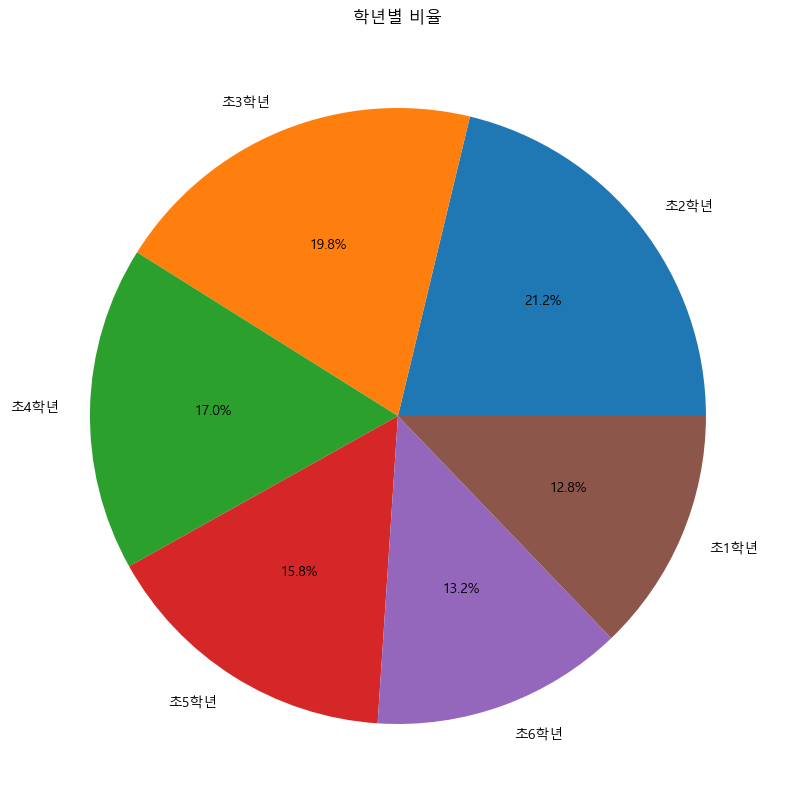

In [29]:
grade = df_del['user_grade_nm'].value_counts()

plt.pie(grade, labels = grade.index, autopct = '%2.1f%%')
plt.title('학년별 비율')
plt.show()

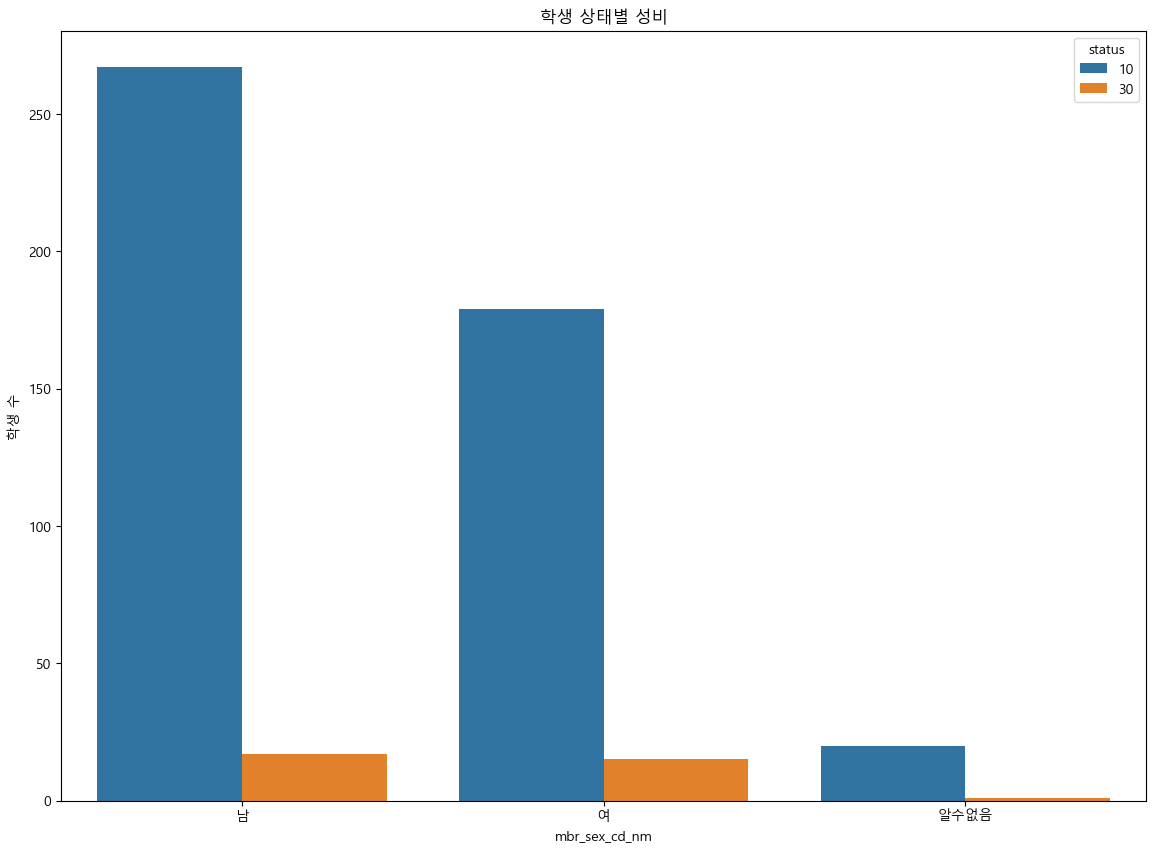

In [30]:
sns.countplot(data = df_del, x = 'mbr_sex_cd_nm', hue = 'status')
plt.xticks(ticks = [0, 1, 2], labels=['남','여','알수없음'])
plt.ylabel('학생 수')
plt.title('학생 상태별 성비')
plt.show()
# status 10 = 정상, 30 = 이탈

In [31]:
df_re['video_jump_cnt'].value_counts()

0.00      17919
1.00       4682
2.00       3983
3.00       1683
4.00        894
          ...  
48.00         1
125.00        1
56.00         1
55.00         1
0.08          1
Name: video_jump_cnt, Length: 280, dtype: int64

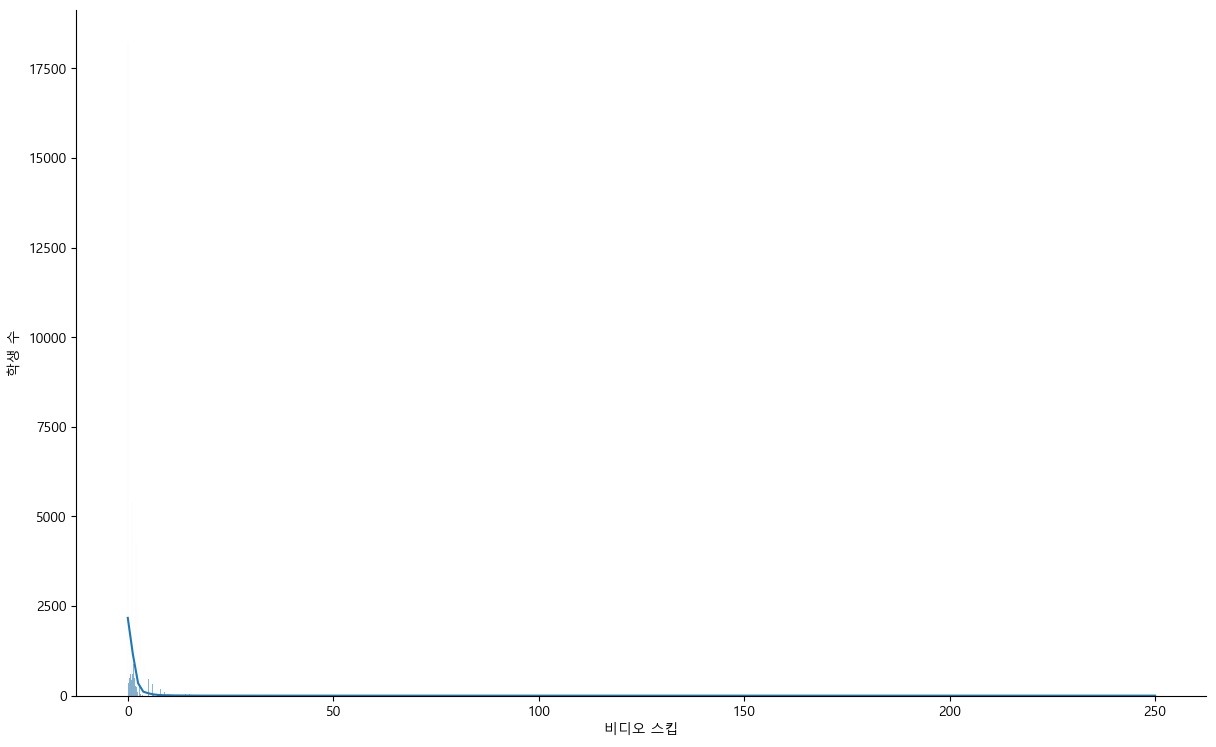

In [32]:
fig = sns.displot(data = df_re, x = 'video_jump_cnt', kde = True)
fig.fig.set_size_inches(14, 8)
plt.xlabel('비디오 스킵')
plt.ylabel('학생 수')
plt.show()
# 스킵을 안하는 학생들이 대부분, video_jump_cnt 변수는 별로 영향을 안줄듯

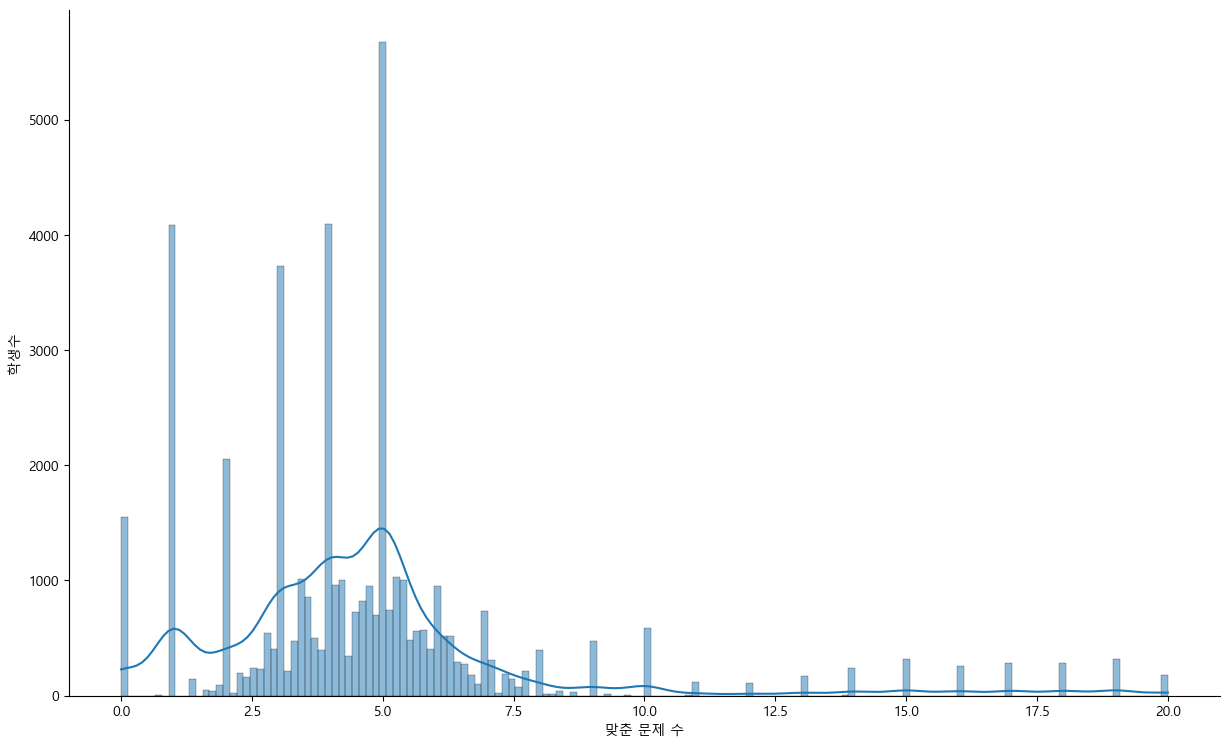

In [33]:
fig = sns.displot(data = df_re, x = 'correct_cnt', kde = True)
fig.fig.set_size_inches(14, 8)
plt.xlabel('맞춘 문제 수')
plt.ylabel('학생수')
plt.show()

## 히스토그램 - 변수선택

C:\Users\leah5\AppData\Local\Temp\ipykernel_32416\298948677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_re.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')


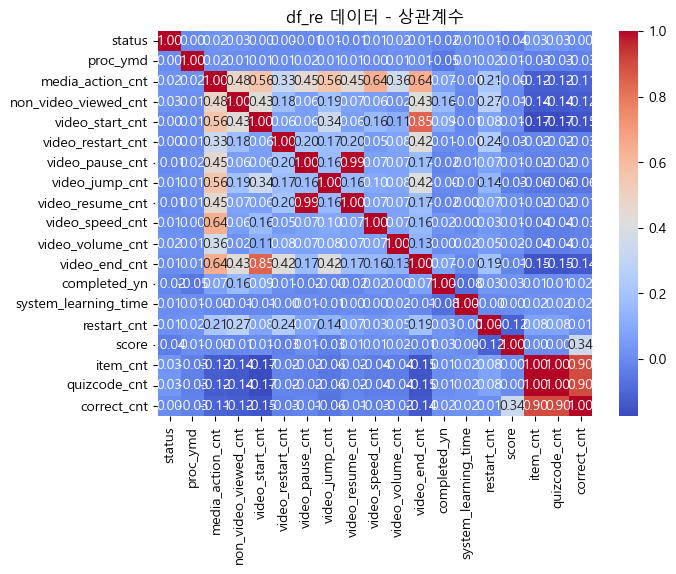

In [34]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_re.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('df_re 데이터 - 상관계수')
plt.show()

<Axes: xlabel='video_resume_cnt', ylabel='video_pause_cnt'>

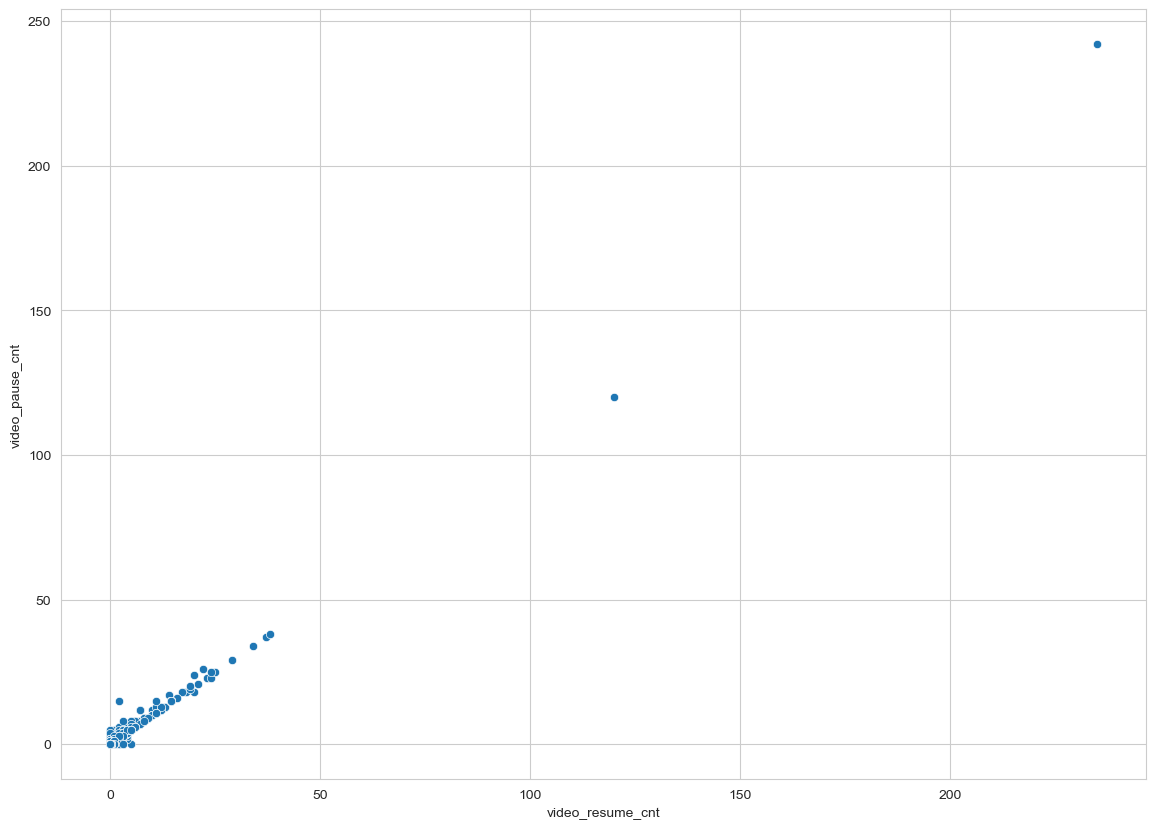

In [35]:
# 변수 간 연관성 검토
sns.set_style('whitegrid')
sns.scatterplot(data=df_re, x='video_resume_cnt', y='video_pause_cnt')

# 서로 연관성이 있어보이므로 'video_resume_cnt' 변수를 제거

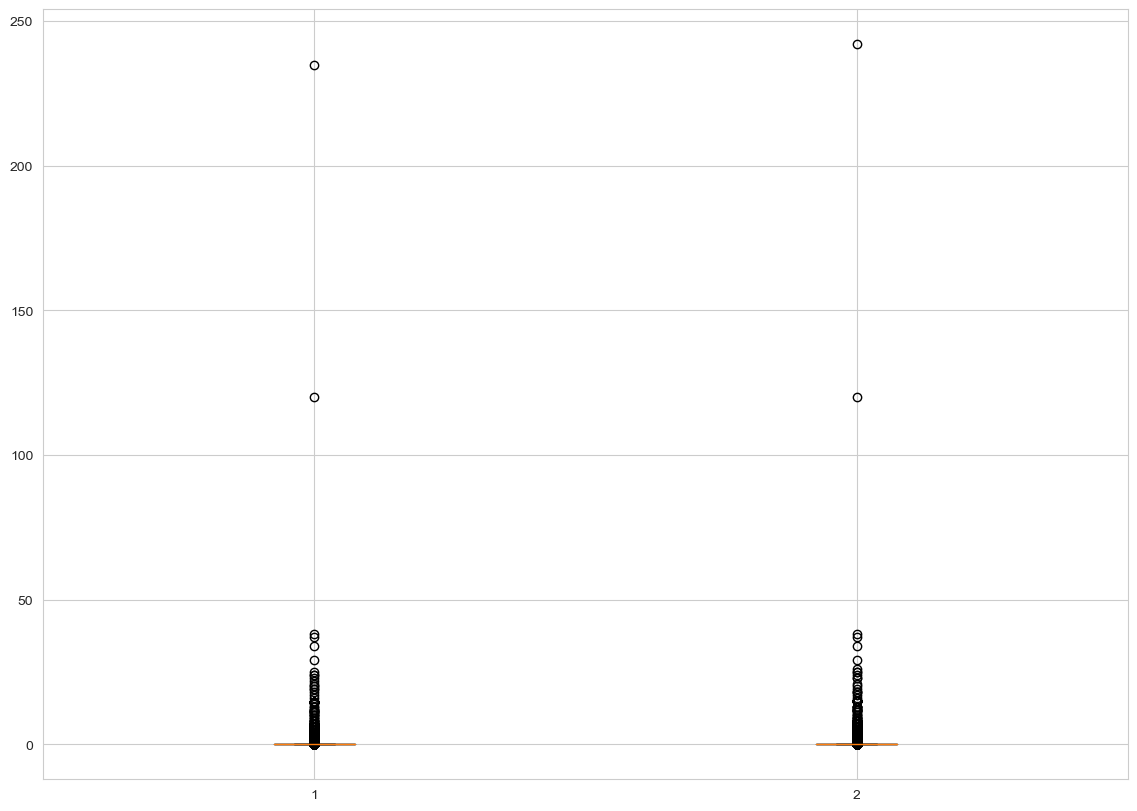

In [36]:
plt.boxplot(df_re[['video_resume_cnt','video_pause_cnt']])
plt.show()

<Axes: xlabel='video_start_cnt', ylabel='video_end_cnt'>

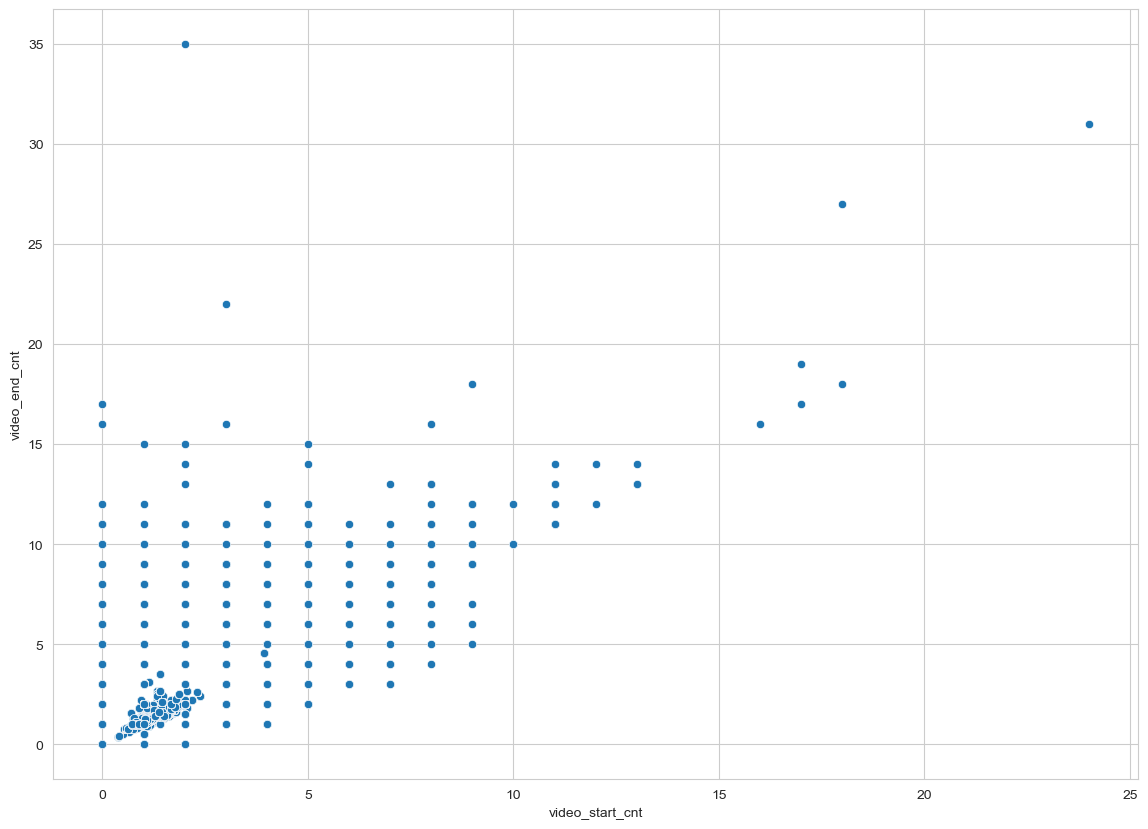

In [37]:
sns.set_style('whitegrid')
sns.scatterplot(data=df_re, x='video_start_cnt', y='video_end_cnt')

## 변수 선택

In [38]:
df_re.drop('video_resume_cnt', axis = 1, inplace = True)

C:\Users\leah5\AppData\Local\Temp\ipykernel_32416\4002769175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re.drop('video_resume_cnt', axis = 1, inplace = True)


In [39]:
df_re.columns

Index(['userid', 'biz_sect_cd_nm', 'mbr_sex_cd_nm', 'mbr_step_cd_nm',
       'user_grade_nm', 'mbr_status_cd_nm', 'grade_sect_cd', 'status',
       'proc_ymd', 'mcode', 'media_action_cnt', 'non_video_viewed_cnt',
       'video_start_cnt', 'video_restart_cnt', 'video_pause_cnt',
       'video_jump_cnt', 'video_speed_cnt', 'video_volume_cnt',
       'video_end_cnt', 'completed_yn', 'assessment_completed_yn',
       'media_completed_yn', 'system_learning_time', 'restart_cnt', 'score',
       'item_cnt', 'quizcode_cnt', 'correct_cnt'],
      dtype='object')

In [40]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45429 entries, 0 to 45428
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   45429 non-null  object 
 1   biz_sect_cd_nm           45429 non-null  object 
 2   mbr_sex_cd_nm            45429 non-null  object 
 3   mbr_step_cd_nm           45429 non-null  object 
 4   user_grade_nm            45429 non-null  object 
 5   mbr_status_cd_nm         45429 non-null  object 
 6   grade_sect_cd            45429 non-null  object 
 7   status                   45429 non-null  int64  
 8   proc_ymd                 45429 non-null  int64  
 9   mcode                    45429 non-null  object 
 10  media_action_cnt         45429 non-null  float64
 11  non_video_viewed_cnt     45429 non-null  float64
 12  video_start_cnt          45429 non-null  float64
 13  video_restart_cnt        45429 non-null  float64
 14  video_pause_cnt       

## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import copy
import random

In [43]:
churn_re = copy.deepcopy(df_re)

churn_re = churn_re.drop(columns = {'mcode', 'proc_ymd'})

encoder = LabelEncoder()

churn_re['biz_sect_cd_nm'] = encoder.fit_transform(churn_re['biz_sect_cd_nm'])
churn_re['mbr_sex_cd_nm'] = encoder.fit_transform(churn_re['mbr_sex_cd_nm'])
churn_re['mbr_step_cd_nm'] = encoder.fit_transform(churn_re['mbr_step_cd_nm'])
churn_re['user_grade_nm'] = encoder.fit_transform(churn_re['user_grade_nm'])
churn_re['mbr_status_cd_nm'] = encoder.fit_transform(churn_re['mbr_status_cd_nm'])
churn_re['grade_sect_cd'] = encoder.fit_transform(churn_re['grade_sect_cd'])
churn_re['assessment_completed_yn'] = encoder.fit_transform(churn_re['assessment_completed_yn'])
churn_re['media_completed_yn'] = encoder.fit_transform(churn_re['media_completed_yn'])

In [44]:
churn_re

,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,media_action_cnt,non_video_viewed_cnt,...,video_end_cnt,completed_yn,assessment_completed_yn,media_completed_yn,system_learning_time,restart_cnt,score,item_cnt,quizcode_cnt,correct_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,0,0,1,2,0,2,10,14.67,6.81,...,2.20,1,1,0,304.18,2.03,0.00,1.00,1.00,0.00
1,777f81e8-c221-4771-9d77-f053e9252ed8,0,0,1,2,0,2,10,30.00,19.00,...,4.00,1,1,1,20.00,3.00,80.00,5.00,5.00,4.00
2,777f81e8-c221-4771-9d77-f053e9252ed8,0,0,1,2,0,2,10,13.00,7.00,...,2.00,1,1,1,44.00,3.00,67.00,3.00,3.00,2.00
3,777f81e8-c221-4771-9d77-f053e9252ed8,0,0,1,2,0,2,10,2.00,2.00,...,0.00,0,0,0,172.00,0.00,49.41,4.98,4.98,2.43
4,777f81e8-c221-4771-9d77-f053e9252ed8,0,0,1,2,0,2,10,14.67,6.81,...,2.20,1,1,0,304.18,2.03,100.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45424,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,0,1,5,0,5,30,9.00,3.00,...,2.00,1,0,1,239.00,1.00,50.70,7.96,7.96,4.11
45425,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,0,1,5,0,5,30,13.85,5.87,...,2.52,1,0,1,0.00,3.27,50.70,7.96,7.96,4.11
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,0,1,5,0,5,30,8.00,8.00,...,0.00,1,0,1,323.00,0.00,50.70,7.96,7.96,4.11
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,0,1,5,0,5,30,24.00,0.00,...,9.00,1,0,1,448.00,8.00,50.70,7.96,7.96,4.11


### train_test_split을 사용하지 않은 데이터 분리
- train_test_split을 사
용하지 않고, 코드 작성을 통해 train/test & input/target 데이터 분리

In [45]:
# 최종 학습 데이터에서 userid 변수를 따로 추출해서 ID 데이터프레임 생성
ID = churn_re['userid']

In [46]:
# userid를 set을 사용하여 중복제거 후 리스트로 반환
ID_list = list(set(ID))

In [47]:
ID_list[:5]

['61dc6f04-9625-4d0f-bab6-de53a9330934',
 '2db08b50-e264-43ee-8f30-12239fb74789',
 '841bcd0c-e333-4c5f-b6e9-18162c92dd9a',
 '0515188e-b2c4-48b5-927c-2f96e24ef230',
 'a688588a-1f14-447b-aa45-28181f905f90']

In [48]:
# 반환된 ID 리스트를 train : test = 400명 : 100명으로 나눈 후, 두개의 리스트를 데이터프레임 형태로 변환
ID_list_train = pd.DataFrame(ID_list[0:400]).rename(columns = {0:'userid'})
ID_list_test = pd.DataFrame(ID_list[400:]).rename(columns = {0:'userid'})

In [49]:
len(ID_list_train)

400

In [50]:
len(ID_list_test)

99

In [51]:
# train 데이터에 해당하는 userid와 일치하는 데이터 갖고 오기
X_train = pd.merge(ID_list_train, churn_re, on ='userid', how = 'left')
# test 데이터에 해당하는 userid와 일치하는 데이터 갖고 오기
X_test = pd.merge(ID_list_test, churn_re, on ='userid', how = 'left' )

In [52]:
# train 데이터의 userid 리스트
ID_train = X_train['userid']

# test 데이터의 userid 리스트
ID_test = X_test['userid']

# train 데이터의 input 데이터
input_train = X_train.drop(columns = {'userid', 'status'})

# test 데이터의 input 데이터
input_test = X_test.drop(columns = {'userid', 'status'})

# train 데이터의 target 데이터
target_train = X_train['status']

# test 데이터의 target 데이터
target_test = X_test['status']

### train 데이터에 fit_transform / test 데이터 transform 적용

In [53]:
scaler = preprocessing.MinMaxScaler()
input_train = pd.DataFrame(scaler.fit_transform(input_train))
input_test = pd.DataFrame(scaler.transform(input_test))

In [54]:
# 모델 불러오기, 정의
DT = DecisionTreeClassifier()
# 학습 데이터로 모델(Decision Tree) 학습
DT.fit(input_train, target_train)


# 학습된 모델로 test 결과값 출력
y_pred = DT.predict(input_test)
y_pred = pd.DataFrame(y_pred).rename(columns = {0 : 'pred'})

### 최종 예측을 위한 데이터셋 생성

- 데이터셋 포맷
-> ID + 실제 이탈 여부 변수 + 모델 예측 결과

In [55]:
result_df = pd.concat([ID_test, target_test, y_pred], axis = 1)

In [68]:
result_df

,userid,status,pred
0,5f37e7ee-4f8f-477e-8212-d4e827a8c9cc,10,10
1,5f37e7ee-4f8f-477e-8212-d4e827a8c9cc,10,10
2,5f37e7ee-4f8f-477e-8212-d4e827a8c9cc,10,10
3,5f37e7ee-4f8f-477e-8212-d4e827a8c9cc,10,10
4,5f37e7ee-4f8f-477e-8212-d4e827a8c9cc,10,10
...,...,...,...
9451,bbb10806-e8d7-43b2-856e-4d9c8aef63ec,10,10
9452,bbb10806-e8d7-43b2-856e-4d9c8aef63ec,10,10
9453,bbb10806-e8d7-43b2-856e-4d9c8aef63ec,10,10
9454,bbb10806-e8d7-43b2-856e-4d9c8aef63ec,10,10


### userid별 일별 이탈로 예측된 비율이 n%보다 높을 경우 이탈로 예측 (id별 예측값 통일)

In [62]:
def get_final_result(result_df, num):
    '''
    각 userid별로 이탈로 예측한 비율에 따라 예측값 변환
    '''
    result_df = result_df[['userid', 'status', 'pred']]
    USER_ID = result_df.drop_duplicates(['userid']).reset_index(drop = True)
    USER_ID = USER_ID[['userid', 'status']]

    pred_group = result_df.groupby(['userid', 'pred']).count().reset_index()
    # 각 userid별로 이탈/미이탈로 예측한 count의 비율 계산 -> 이탈로 예측한 count / 전체 action count
    pred_group['ratio'] = pred_group.groupby(['userid'])['status'].apply(lambda x : x/x.sum())

    # 각 userid별로 이탈로 예측한 비율만 반환 (단, 이탈로 예측한 case가 없을 경우, 미이탈로 예측한 비율을 대신 반환)
    pred_group = pred_group.sort_values(['userid', 'pred'], ascending = [True, False]).drop_duplicates(['userid'], keep = 'first')
    # 미이탈로 100% 예측헀다면 이탈로 예측한 확률을 0%으로 계산 (1.00 - 1.00)%
    pred_group['ratio_re'] = pred_group[['pred', 'ratio']].apply(lambda x : x['ratio'] if x['pred'] == 30 else float(1 - x['ratio']), axis = 1)
    pred_group = pred_group[['userid', 'pred', 'ratio_re']]
    # 일정 비율 이상 이탈로 예측했을 경우, 이탈로 변환
    pred_group['pred'] = pred_group.apply(lambda x : 30 if x['ratio_re'] >= num else 10, axis = 1)
    pred_group = pred_group[['userid', 'pred']]

    test_result = pd.merge(USER_ID, pred_group, on = 'userid', how = 'left')

    return test_result

In [71]:
final = get_final_result(result_df, 0.3)

C:\Users\leah5\AppData\Local\Temp\ipykernel_32416\1753552206.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pred_group['ratio'] = pred_group.groupby(['userid'])['status'].apply(lambda x : x/x.sum())


In [70]:
final.groupby(['userid','status']).count()

,,pred
userid,status,
04a501bb-1222-4b64-9b85-f133110d4fcc,10,1
050e6435-45f0-4df8-bd11-d06a3e73c604,10,1
058f5d2c-a474-4467-bdea-af154bca8c01,10,1
0b34d1f8-4c47-43dc-a05d-c0dc3bcc336f,10,1
0e4b1a2b-d102-468e-a6ba-df05886d485e,10,1
...,...,...
f6d1a38a-9dcf-43a3-bb3c-2b663075db5c,10,1
fa50846f-6acf-4854-ad0c-035936e8e2ef,10,1
fb29017c-7a70-4f93-912c-493facdc3d08,10,1


## 모델 성능 평가

In [72]:
y_test = final['status']
y_pred = final['pred']

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average = 'macro'), 3)
recall = round(recall_score(y_test, y_pred, average = 'macro'), 3)

print('accuracy : ', accuracy, '\n',
      'precision : ', precision, '\n',
      'recall : ', recall)

accuracy :  0.879 
 precision :  0.473 
 recall :  0.463


In [73]:
y_test = y_test.astype(int).tolist()
y_pred = y_pred.astype(int).tolist()

model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

          10       0.95      0.93      0.94        94
          30       0.00      0.00      0.00         5

    accuracy                           0.88        99
   macro avg       0.47      0.46      0.47        99
weighted avg       0.90      0.88      0.89        99

